<a href="https://colab.research.google.com/github/PAS-A/testaccountedit/blob/main/haze.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. โคลนโปรเจคจากกิตฮับและตั้งค่าโปรเจ็กต์

In [ ]:
!git clone https://github.com/tranleanh/haze-synthesis.git
%cd haze-synthesis
!pip install -r requirements.txt

# สร้างโฟลเดอร์ inputs (ถ้ายังไม่มี) สำหรับรูปต้นฉบับ
# และสร้าง outputs (ถ้ายังไม่มี) สำหรับเก็บผลลัพธ์
!mkdir -p inputs outputs

Cloning into 'haze-synthesis'...
remote: Enumerating objects: 205, done.
remote: Counting objects: 100% (60/60), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 205 (delta 53), reused 27 (delta 27), pack-reused 145 (from 1)
Receiving objects: 100% (205/205), 9.67 MiB | 18.93 MiB/s, done.
Resolving deltas: 100% (78/78), done.
/content/haze-synthesis
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 463.1/463.1 kB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.9/37.9 MB 17.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 32.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11

# 2.ดาวน์โหลดโมเดลหมอกจาก Github  https://github.com/nianticlabs/monodepth2.git


* *ในงานนี้ส่วนใหญ่ใช้* >> https://storage.googleapis.com/niantic-lon-static/research/monodepth2/mono%2Bstereo_640x192.zip

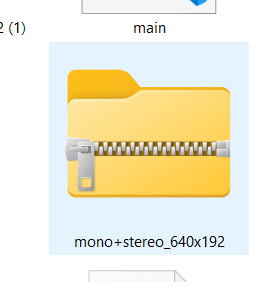

# 3.แตกไฟล์ลงโฟลเดอร์กิตอันแรกที่โหลดมา  ที่ haze-synthesis> models> mono+stereo_640x192

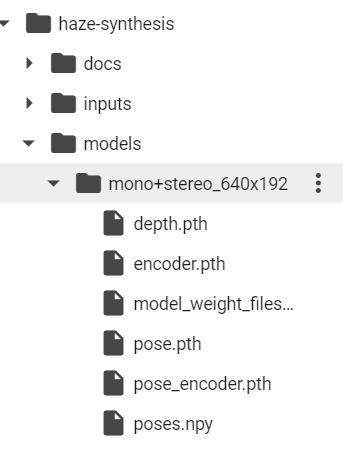

# 4. อัปโหลดรูปภาพต้นฉบับลงในโฟลเดอร์ inputs ( รับเฉพาะไฟล์ .jpeg)
หรือกด run code ด้านล่าง รับเฉพาะไฟล์ .jpeg


In [ ]:
from google.colab import files
import os

uploaded = files.upload()  # เลือกรูปภาพจากเครื่องของคุณ

for fn in uploaded.keys():
    os.rename(fn, f"inputs/{fn}")

Saving 20240225_155313.jpg to 20240225_155313.jpg


* เมื่อรันเซลล์นี้แล้ว ระบบจะถามให้คุณอัปโหลดไฟล์จากเครื่อง (เช่น image1.
jpg, image2.jpg) และไฟล์จะถูกเก็บไว้ใน /content/haze-synthesis/inputs



#  5 .รันสคริปต์ haze-synthesis หลายค่าเบต้า

In [ ]:
import os

# สมมติจะทดสอบ 3 ค่าเบต้า: 1.0, 1.5, 2.0
betas = [1.0, 1.5, 2.0]

for b in betas:
    # เพื่อหลีกเลี่ยงปัญหาจุดทศนิยมในชื่อโฟลเดอร์
    beta_str = str(b).replace('.', '_')
    out_path = f"./outputs/beta_{beta_str}"
    os.makedirs(out_path, exist_ok=True)

    !python main.py --image_path ./inputs \
                    --output_image_path {out_path} \
                    --model_name mono+stereo_640x192 \
                    --beta {b} \
                    --airlight 150


-> Loading model from  models/mono+stereo_640x192
   Loading pretrained encoder
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
   Loading pretrained decoder
-> Predicting on 11 test images
   Processed 1 of 11 images
   Processed 2 of 11 images
   Processed 3 of 11 images
   Processed 4 of 11 images
   Processed 5 of 11 images
   Processed 6 of 11 images
   Processed 7 of 11 images
   Processed 8 of 11 images
   Processed 9 of 11 images
   Processed 10 of 11 images
   Processed 11 of 11 images
-> Done! Fin



### **อธิบาย**:
1. กำหนดตัวแปร `betas` เป็นลิสต์ `[1.0, 1.5, 2.0]` เพื่อบอกว่าต้องการทดสอบค่าความหนาแน่นของหมอก (beta) 3 ค่า
2. วนลูป `for b in betas:` เพื่อรันโปรแกรมสังเคราะห์หมอกครั้งละ 1 ค่าเบต้า  
3. `beta_str = str(b).replace('.', '_')` : แปลงค่าทศนิยมเป็นสตริง โดยเปลี่ยน `.` เป็น `_` เพื่อใช้เป็นชื่อโฟลเดอร์ (ป้องกันปัญหาชื่อไฟล์มีจุด)  
4. `out_path = f"./outputs/beta_{beta_str}"` : ตั้งชื่อโฟลเดอร์สำหรับเอาต์พุต เช่น `./outputs/beta_1_0`  
5. `os.makedirs(out_path, exist_ok=True)` : สร้างโฟลเดอร์ดังกล่าว ถ้ายังไม่มี  
6. คำสั่ง `!python main.py ...` จะเรียก `main.py` จาก haze-synthesis ด้วยอาร์กิวเมนต์
   - `--image_path ./inputs` : โฟลเดอร์ภาพต้นฉบับ
   - `--output_image_path {out_path}` : โฟลเดอร์ผลลัพธ์ (ต่างกันไปตามค่าเบต้า)
   - `--model_name mono+stereo_640x192` : ชื่อโมเดลที่เก็บไว้ใน `models/mono+stereo_640x192`
   - `--beta {b}` : ค่าเบต้า (1.0, 1.5, หรือ 2.0)
   - `--airlight 150` : ค่าความสว่างพื้นหลัง

> เมื่อสคริปต์รันเสร็จแต่ละครั้ง จะได้ไฟล์ภาพผลลัพธ์อยู่ในโฟลเดอร์ `./outputs/beta_{ค่าเบต้า}`



# 6 แสดงผลลัพธ์เป็น Grid เทียบกัน (ต้นฉบับ vs หลายค่าเบต้า)

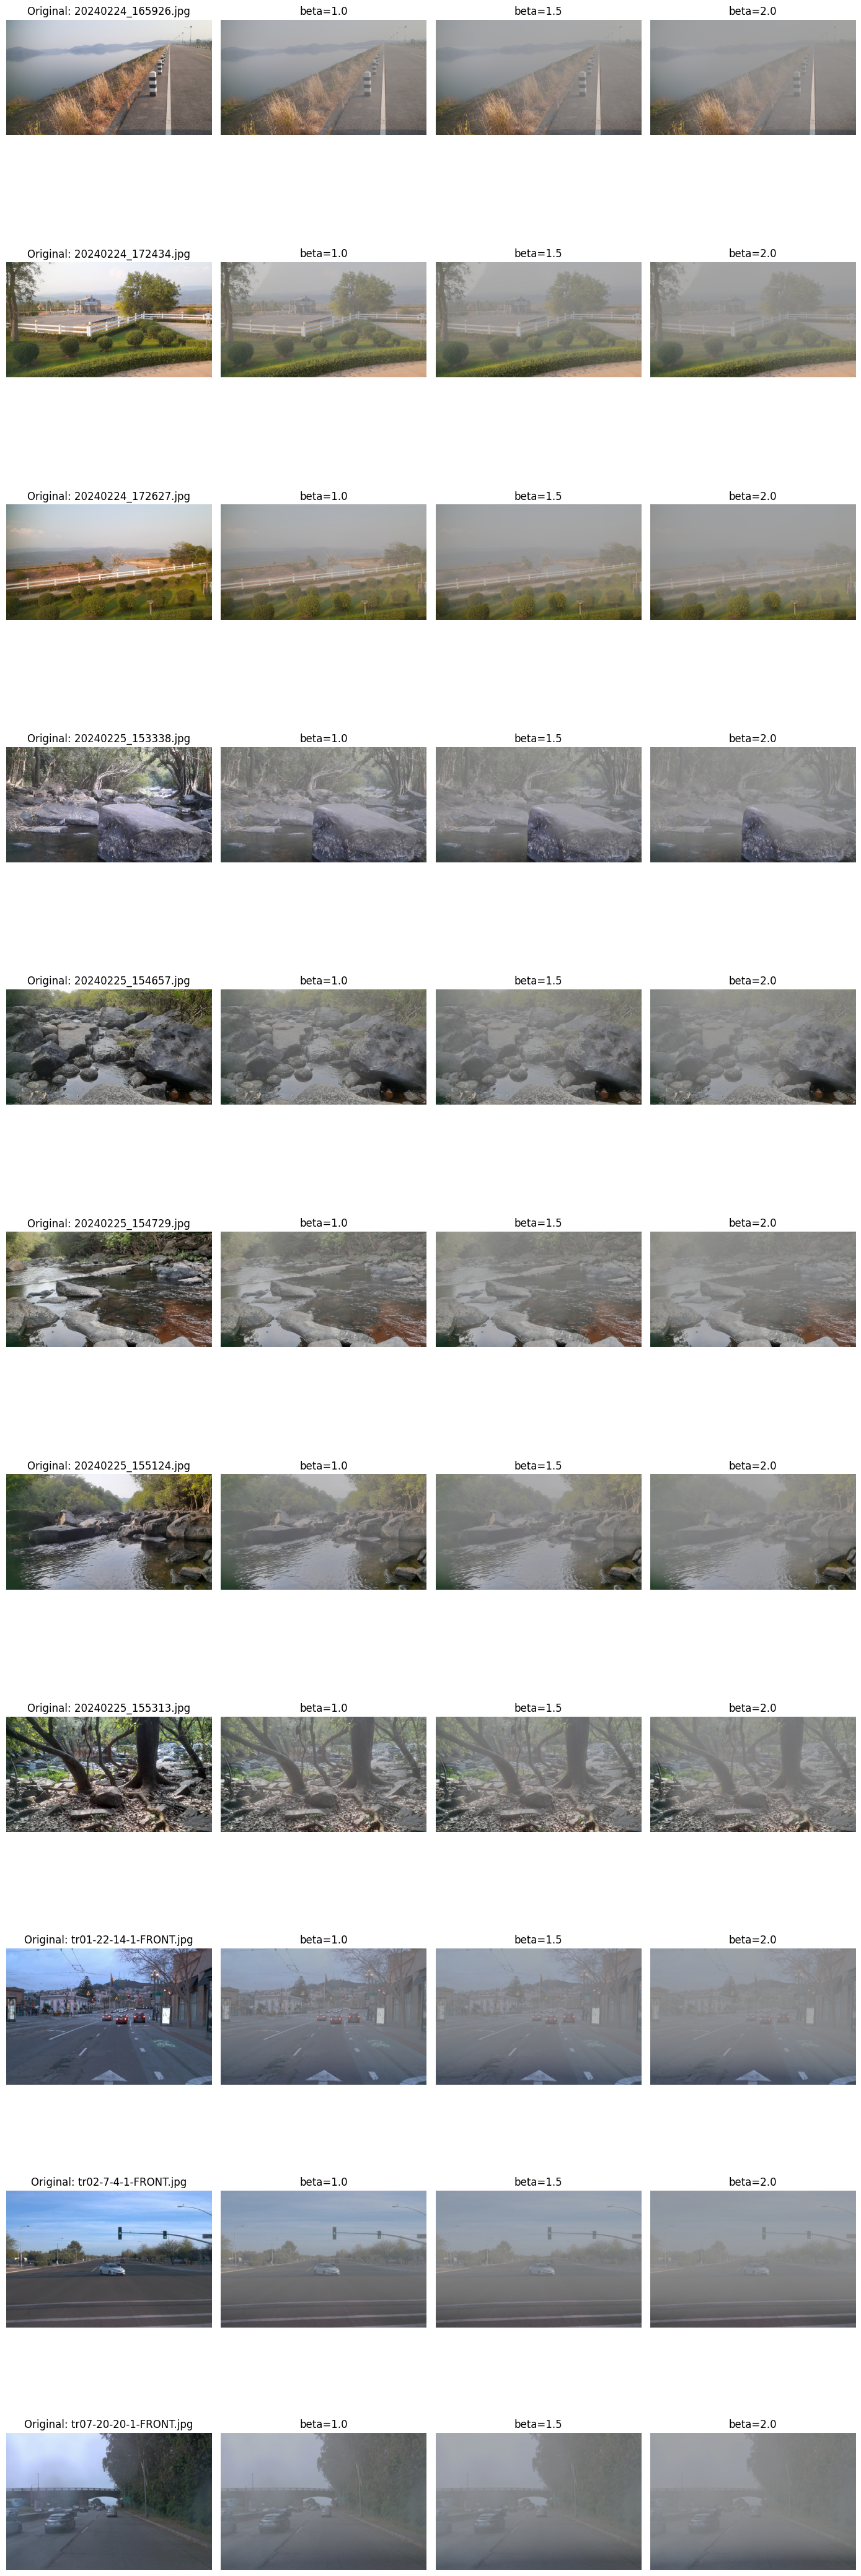

In [ ]:
import matplotlib.pyplot as plt
import cv2
import glob
import os

# ดึงรายชื่อไฟล์ภาพจาก inputs
input_images = sorted(glob.glob("inputs/*"))

betas = [1.0, 1.5, 2.0]
plt.figure(figsize=(14, 4 * len(input_images)))  # ปรับขนาดตามต้องการ

for i, img_path in enumerate(input_images):
    img_name = os.path.basename(img_path)
    # อ่านภาพต้นฉบับ (OpenCV อ่านเป็น BGR -> แปลงเป็น RGB)
    original = cv2.imread(img_path)[:,:,::-1]

    # Plot คอลัมน์แรกเป็นภาพ Original
    plt.subplot(len(input_images), len(betas)+1, i*(len(betas)+1)+1)
    plt.imshow(original)
    plt.title(f"Original: {img_name}")
    plt.axis("off")

    # วนลูปแสดงภาพผลลัพธ์แต่ละค่าเบต้า
    for j, b in enumerate(betas):
        beta_str = str(b).replace('.', '_')
        out_folder = f"./outputs/beta_{beta_str}"
        # ชื่อไฟล์ผลลัพธ์มักเป็น "ชื่อเดิม + _synt.jpg"
        # เช่น car.jpg -> car_synt.jpg
        # จึงต้องต่อ _synt.jpg เข้าไป
        base, ext = os.path.splitext(img_name)
        out_img_path = os.path.join(out_folder, f"{base}_synt{ext}")

        plt.subplot(len(input_images), len(betas)+1, i*(len(betas)+1)+(j+2))
        if os.path.exists(out_img_path):
            haze = cv2.imread(out_img_path)[:,:,::-1]
            plt.imshow(haze)
            plt.title(f"beta={b}")
        else:
            # ถ้าไม่เจอไฟล์ผลลัพธ์ จะแสดงข้อความ "No output found"
            plt.text(0.5, 0.5, 'No output found', ha='center', va='center')
        plt.axis("off")

plt.tight_layout()
plt.show()

# เคลียไฟล์โฟลเด้อoutput ตรงนี้ถ้าจะใส่ Input ใหม่ และกด run ภาพ output จะได้ไม่ซ้ำ

In [ ]:


import shutil
import os

# ลบโฟลเดอร์ outputs ทั้งหมด
if os.path.exists("outputs"):
    shutil.rmtree("outputs")

# สร้างโฟลเดอร์ outputs ใหม่
!mkdir -p outputs
